# Restaurant Review Sentimental Analysis using Natural Language Processing

In [99]:
# Importing necessary libraries

import pandas as pd
import os
import pickle
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kishore\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
df=pd.read_csv(os.path.join(os.path.abspath(''),r"Restaurant_Reviews.tsv"),delimiter='\t')


In [101]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Data Preprocessing

In [102]:
check_null = df.isnull().sum()

In [103]:
check_null

Review    0
Liked     0
dtype: int64

In [104]:
df.shape

(1000, 2)

In [105]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [106]:
df["Review"].describe()

count                 1000
unique                 996
top       I won't be back.
freq                     2
Name: Review, dtype: object

In [107]:
df["Review"].unique()

array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.',
       'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
       'The selection on the menu was great and so were the prices.',
       'Now I am getting angry and I want my damn pho.',
       "Honeslty it didn't taste THAT fresh.)",
       'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
       'The fries were great too.', 'A great touch.',
       'Service was very prompt.', 'Would not go back.',
       'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
       'I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!',
       'I was disgusted because I was pretty sure that was human hair.',
       'I was shocked because no signs indicate cash only.',
       'Highly recommended.', 'Waitress was a little slow in service.'

In [108]:
df["Liked"].describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Liked, dtype: float64

In [109]:
string=df['Review'][0]

In [110]:
string

'Wow... Loved this place.'

In [111]:
review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][0]) # Removing special charecters

In [112]:
review

'Wow    Loved this place '

In [113]:
review_words = review.split()

In [114]:
review_words

['Wow', 'Loved', 'this', 'place']

In [115]:
review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

In [116]:
review_words

['Wow', 'Loved', 'place']

In [117]:
# Stemming the words

ps = PorterStemmer() #[tHIS REMOVES THE TENSE[EX PAST TENSE FUTURE TEMSE IN THE WORD]

In [118]:
review = [ps.stem(word) for word in review_words]

In [119]:
review

['wow', 'love', 'place']

In [120]:
review=" ".join(review)

In [121]:
review

'wow love place'

In [122]:
#  Do the above process for all the review in our dataset

In [123]:
corpus=[]
for i in range(len(df["Review"])):
    review=re.sub("[^a-zA-Z]", repl=" ",string=df["Review"][i])
    review=review.split()
    remove_stopwords=[words for words in review if words not in set(stopwords.words("english"))]
    ps=PorterStemmer()
    cleaned_reviews=[ps.stem(words) for words in remove_stopwords]
    cleaned_reviews=" ".join(cleaned_reviews)
    corpus.append(cleaned_reviews)
                                                                   

In [124]:
corpus

['wow love place',
 'crust good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'the select menu great price',
 'now I get angri I want damn pho',
 'honeslti tast that fresh',
 'the potato like rubber could tell made ahead time kept warmer',
 'the fri great',
 'A great touch',
 'servic prompt',
 'would go back',
 'the cashier care ever I say still end wayyy overpr',
 'I tri cape cod ravoli chicken cranberri mmmm',
 'I disgust I pretti sure human hair',
 'I shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'thi place worth time let alon vega',
 'like',
 'the burritto blah',
 'the food amaz',
 'servic also cute',
 'I could care less the interior beauti',
 'So perform',
 'that right red velvet cake ohhh stuff good',
 'they never brought salad ask',
 'thi hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm our sever run around like total overwhelm',
 'the worst salmon sashimi

# Creating bag of words

In [125]:
cv = CountVectorizer()
X=cv.fit_transform(corpus).toarray()

In [126]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [127]:
Y = df.iloc[:, 1].values 

# Creating a pickle file for the CountVectorizer

In [128]:
pickle.dump(cv, open('countvectorizer.pkl', 'wb'))

# Creating Holdout Environment

In [129]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

#### Run Kfold validation with different ML model object. Choose model with highest accuracy



In [130]:
modelAccuracy={}

In [131]:
def run_kfold(clf):
    kf = KFold(n_splits=3)
    print (kf.split(X))

    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = Y[train_index], Y[test_index]
        
        clf.fit(Xtrain, ytrain)
        predictions = clf.predict(Xtest)
        accuracy = accuracy_score(ytest, predictions)
        outcomes.append(accuracy)
    mean_outcome = np.mean(outcomes)
    print(fold)
    print("Mean Accuracy: {0}".format(mean_outcome)) 
    modelAccuracy[clf]=round(mean_outcome * 100)

In [132]:
DT_model = DecisionTreeClassifier()
run_kfold(DT_model)


<generator object _BaseKFold.split at 0x000002B291284F48>
3
Mean Accuracy: 0.7060084036131942


In [133]:
knn = KNeighborsClassifier(n_neighbors = 14)
run_kfold(knn)

<generator object _BaseKFold.split at 0x000002B291FFD7C8>
3
Mean Accuracy: 0.6190501879124634


In [134]:
random_forest = RandomForestClassifier()
run_kfold(random_forest)

<generator object _BaseKFold.split at 0x000002B291284648>
3
Mean Accuracy: 0.7220004435573298


In [135]:
logreg = LogisticRegression()
run_kfold(logreg)

<generator object _BaseKFold.split at 0x000002B291284E48>
3
Mean Accuracy: 0.7479905054755354


In [136]:
svc = SVC()
run_kfold(svc)

<generator object _BaseKFold.split at 0x000002B291284E48>
3
Mean Accuracy: 0.7169954385523246


In [137]:
Naivebayes=MultinomialNB()

In [138]:
run_kfold(Naivebayes)

<generator object _BaseKFold.split at 0x000002B291284E48>
3
Mean Accuracy: 0.7629785474096851


#### Plotting  the classifier accuracy after KFold cross Validation for each model object 

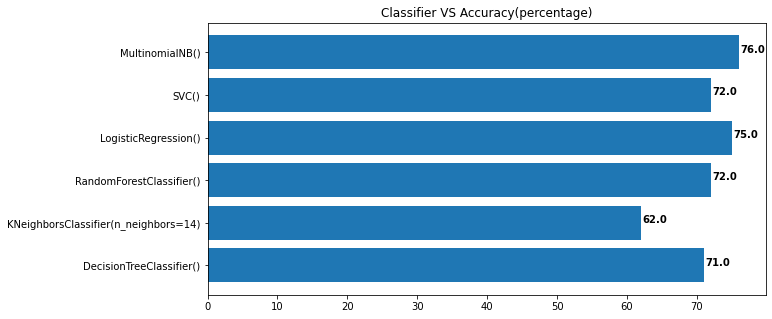

In [139]:
labels = modelAccuracy.keys()
numbers =modelAccuracy.values()
index = np.arange(len(labels))
plt.figure(figsize=(10,5))
plt.barh(index,numbers)
for i, v in enumerate(numbers):
    plt.text(v + 0.2, i , str(v), color='black', fontweight='bold')
plt.yticks(index, labels, fontsize=10, rotation=0)
plt.title("Classifier VS Accuracy(percentage)")
plt.show()

In [ ]:
#### From above plot it is clear that mutinomial naive bayes has better accuracy

In [141]:
classifier = MultinomialNB(alpha=1)
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)

# Evaluate Model

In [142]:
# Computing Model Accuracy

print("Accuracy:",round(accuracy_score(Y_test, predictions),2) * 100, "%")

print ("---------------")

Accuracy: 78.0 %
---------------


In [152]:
len(X_test)

200

In [143]:
print ("Confusion matrix")

print ("---------------")
print(confusion_matrix(Y_test, predictions))



# Model detailed classification report

print ("---------------")
print("Classification report", classification_report(Y_test, predictions))

Confusion matrix
---------------
[[72 27]
 [18 83]]
---------------
Classification report               precision    recall  f1-score   support

           0       0.80      0.73      0.76        99
           1       0.75      0.82      0.79       101

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200



# Test the model with new set of data

In [144]:
testReview="Best vegetarian food Vast range of dishes including continental, south Indian and North Indian... They are taking all the safety measures during the Covid situation"

In [145]:
data = [testReview]
vect = cv.transform(data).toarray()
prediction = classifier.predict(vect)

In [146]:
prediction

array([1], dtype=int64)

In [147]:
testreview2="Big venue, live music, awful food"
vect = cv.transform([testreview2]).toarray()
prediction = classifier.predict(vect)

In [148]:
prediction

array([0], dtype=int64)

In [ ]:
# From above evaluation it is clear that our model is able to classify positive review with prediction=1 and negative review with prediction=0

In [149]:
# saving model

In [150]:
import pickle
pickle_out=open("Sentimental-analysis.pkl","wb")
pickle.dump(classifier,pickle_out)
pickle_out.close()